## GPS Processing Code 1

This code takes individual GPS time series data from individual stations:

1. removes outliers
2. removes steps 
3. smooths the time series
4. removies annual and biannual seasonal signals
5. detrends the entire time series

The format of the GPS file should follow:

YYYYMMDD ------ dN ------ dE ------ dU ------ $\sigma$N ------ $\sigma$E ------ $\sigma$U

### Import Packages

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
def find_outliers(diff):

    outlier_idx = diff.index[diff['N'].abs()>50].to_list()
    outlier_idx.extend(diff.index[diff['E'].abs()>50].to_list())
    outlier_idx.extend(diff.index[diff['U'].abs()>50].to_list())

    return (outlier_idx.sort())
    

In [3]:
def remove_outliers(GPS_def,outlier_idx):

    fixed = []

    for idx, val in enumerate(outlier_idx):
    
        if fixed.count(val) == 0:
            if outlier_idx.count(idx+1) > 0:
                GPS_df.loc[val,'N'] = GPS_df.loc[val-1,'N']
                GPS_df.loc[val,'E'] = GPS_df.loc[val-1,'E']
                GPS_df.loc[val,'U'] = GPS_df.loc[val-1,'U']
            else:
                GPS_df.loc[val,'N'] = (GPS_df.loc[val-1,'N'] + GPS_df.loc[val+1,'N'])/2
                GPS_df.loc[val,'E'] = (GPS_df.loc[val-1,'E'] + GPS_df.loc[val+1,'E'])/2
                GPS_df.loc[val,'U'] = (GPS_df.loc[val-1,'U'] + GPS_df.loc[val+1,'U'])/2
        fixed.append(outlier_idx[idx])

In [22]:
def remove_steps(GPS_df, station_steps, comp):
    
    station_steps = station_steps.reset_index(drop=True)
    
    for index, row in station_steps.iterrows():
        
        idx = GPS_df.index[GPS_df['Date']==station_steps['Date'].iloc[index]].to_list()
        #average position 21 days before event
        if idx < 21:
            before = GPS_df[comp].iloc[:idx[0]-1].mean(
        else:
            before = GPS_df[comp].iloc[idx[0]-21:idx[0]-1].mean()
        #average position 21 days after event
        if idx[0] + 21 > len(GPS_df.index):
            after = GPS_df[comp].iloc[idx[0]+1:].mean()
        else:
            after = GPS_df[comp].iloc[idx[0]+1:idx[0]+21].mean()
        offset = after - before

        GPS_df.loc[GPS_df.index >= idx[0],comp] -= offset

SyntaxError: invalid syntax (<ipython-input-22-6813b9547a61>, line 11)

IndexError: list index out of range

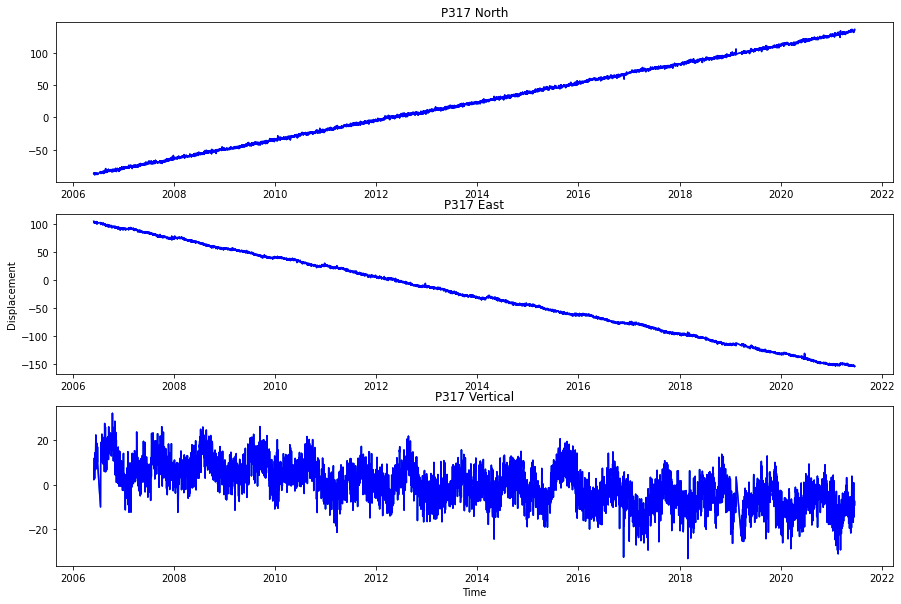

In [21]:
files = glob.glob('????')

for file in files:
    
    GPS_df = pd.read_csv(file, delim_whitespace=True, names=['Date','N','E','U','sN','sE','sU'])
    GPS_df['Date'] = pd.to_datetime(GPS_df['Date'], format='%Y%m%d')

    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize =(15,10))
    ax1.plot(GPS_df['Date'],GPS_df['N'])
    ax1.set_title(file + ' North')
    ax2.plot(GPS_df['Date'],GPS_df['E'])
    ax2.set_title(file + ' East')
    ax2.set_ylabel('Displacement')
    ax3.plot(GPS_df['Date'],GPS_df['U'])
    ax3.set_title(file + ' Vertical')
    ax3.set_xlabel('Time')
    
#remove outliers
    
    df_diff = GPS_df.diff()
    outlier_idx = find_outliers(df_diff)
    
    while outlier_idx:
        remove_outliers(GPS_df, outlier_idx)
        df_diff = GPS_df.diff()
        outlier_idx = find_outliers(df_diff)
    
    ax1.plot(GPS_df['Date'],GPS_df['N'],'b')
    ax2.plot(GPS_df['Date'],GPS_df['E'],'b')
    ax3.plot(GPS_df['Date'],GPS_df['U'],'b')
    
#remove steps
    
    step_df = pd.read_csv('step_file.txt', delim_whitespace=True, names=['Station','Date'])
    step_df['Date'] = pd.to_datetime(step_df['Date'], format='%Y%m%d')
    
    station_steps = step_df[step_df['Station'].str.match(file)]
    
    remove_steps(GPS_df,station_steps,'N')
    remove_steps(GPS_df,station_steps,'E')
    remove_steps(GPS_df,station_steps,'U')

    ax1.plot(GPS_df['Date'],GPS_df['N'],'r')
    ax2.plot(GPS_df['Date'],GPS_df['E'],'r')
    ax3.plot(GPS_df['Date'],GPS_df['U'],'r')
    


    plt.show()

    input("Enter")
    clear_output()
    

In [18]:
len(GPS_df.index)

5413

Text(0.5, 0, 'Time')

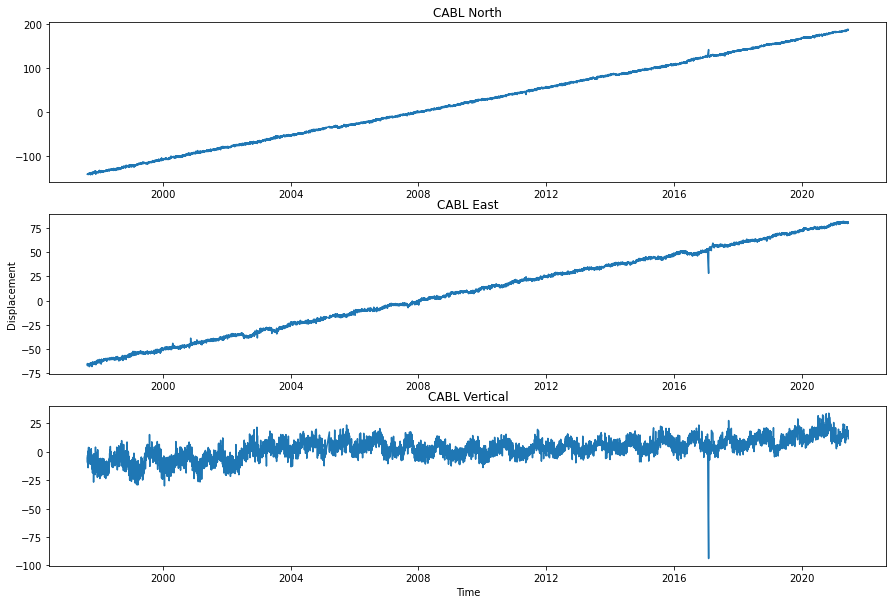

In [54]:
files = glob.glob('????')

GPS_df = pd.read_csv(files[0], delim_whitespace=True, names=['Date','N','E','U','sN','sE','sU'])
GPS_df['Date'] = pd.to_datetime(GPS_df['Date'], format='%Y%m%d')

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize =(15,10))
ax1.plot(GPS_df['Date'],GPS_df['N'])
ax1.set_title(files[0] + ' North')
ax2.plot(GPS_df['Date'],GPS_df['E'])
ax2.set_title(files[0] + ' East')
ax2.set_ylabel('Displacement')
ax3.plot(GPS_df['Date'],GPS_df['U'])
ax3.set_title(files[0] + ' Vertical')
ax3.set_xlabel('Time')

In [9]:
df_diff.max()

Date    36 days 00:00:00
N                  15.52
E                  25.22
U                  94.59
sN                205.93
sE                153.72
sU                353.46
dtype: object

In [55]:
df_diff = GPS_df.diff()

outlier_idx = df_diff.index[df_diff['N'].abs()>50].to_list()
outlier_idx.extend(df_diff.index[df_diff['E'].abs()>50].to_list())
outlier_idx.extend(df_diff.index[df_diff['U'].abs()>50].to_list())

outlier_idx.sort()

fixed = []

for idx, val in enumerate(outlier_idx):
    
    if fixed.count(val) == 0:
        if outlier_idx.count(idx+1) > 0:
            GPS_df.loc[val,'N'] = GPS_df.loc[val-1,'N']
            GPS_df.loc[val,'E'] = GPS_df.loc[val-1,'E']
            GPS_df.loc[val,'U'] = GPS_df.loc[val-1,'U']
        else:
            GPS_df.loc[val,'N'] = (GPS_df.loc[val-1,'N'] + GPS_df.loc[val+1,'N'])/2
            GPS_df.loc[val,'E'] = (GPS_df.loc[val-1,'E'] + GPS_df.loc[val+1,'E'])/2
            GPS_df.loc[val,'U'] = (GPS_df.loc[val-1,'U'] + GPS_df.loc[val+1,'U'])/2
    fixed.append(outlier_idx[idx])


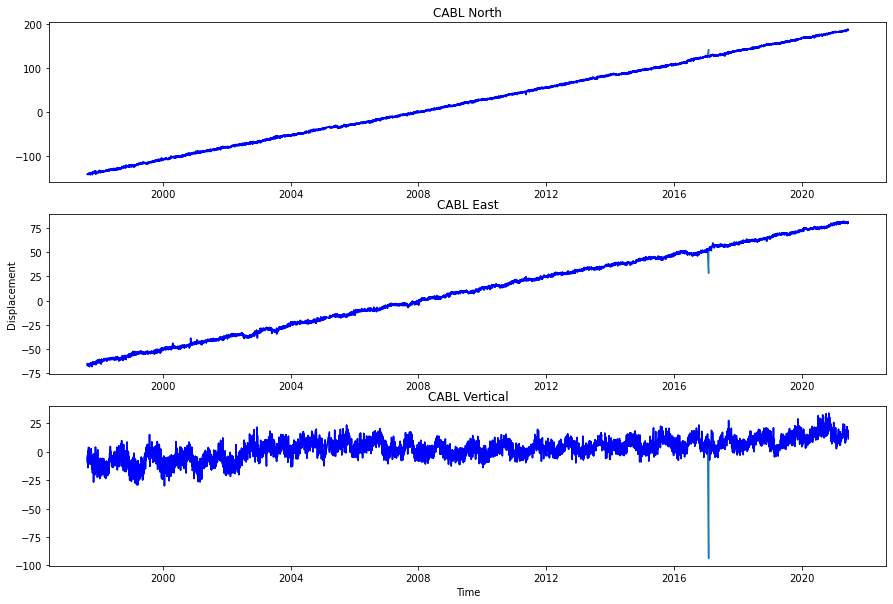

In [56]:
ax1.plot(GPS_df['Date'],GPS_df['N'],'b')
ax2.plot(GPS_df['Date'],GPS_df['E'],'b')
ax3.plot(GPS_df['Date'],GPS_df['U'],'b')

fig

In [ ]:
fixed

In [ ]:
GPS_df.loc[1822]

In [ ]:
df_diff.loc[1822]